<a href="https://colab.research.google.com/github/revalina33/Data_Mining/blob/main/CheckPoint_(3)_Sanny_Revalina_Abigail_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis peningkatan pengguna netflix berdasarkan faktor-faktor yang mempengaruhi**

#**Import Library**

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#**Inisiasi Variabel untuk menyimpan dataframe**

In [29]:
df = pd.read_csv ('Netflix Userbase.csv')

#**BUSINESS UNDERSTANDING**

##**Business Objective**

tujuan dari dataset ini adalah untuk mengetahui tingkat penggunaan langganan pada aplikasi Netflix. selain itu juga untuk menentukan faktor-faktor yang mempengaruhi prefensi tersebut. pada dataset tersebut terdapat informasi seperti jenis langganan pengguna (Basic, Standard, atau Premium), pendapatan bulanan yang dihasilkan dari langganan mereka, tanggal mereka bergabung dengan Netflix (Tanggal Bergabung), tanggal pembayaran terakhir mereka (Tanggal Pembayaran Terakhir), dan negara tempat mereka berada.

##**Assess Situation**

Situasi yang mendasari situasi ini adalah untuk mendapatkan pemahaman mendalam tentang jenis langganan serta faktor yang menyebabkan pengguna untuk menggunakan layanan tersebut.melalui analisis dataset yang ada, dapat diketahui berbagai macam jenis perangkat yang sering digunakan oleh pengguna netflix untuk mengakses layanan, aktivitas langganan, dan status akun pengguna.

##**Data Mining Goals**

tujuan dari data mining ini adalah untuk memprediksi pengguna Netflix kedepannya berdarsakan faktor-faktor yang mempengaruhi melalui data yang telah terkumpul.dengan memanfaatkan metode analisis data, akan mempermudah untuk mengidentifikasi pola-pola dan hubungan antara variabel-variabel seperti jenis langganan, pendapatan bulanan, tipe perangkat, aktivitas langganan, dan status akun.

##**Project Plan**

rencana proyek untuk menganalisis dataset ini dimulai dengan mengumpulkan data-data yang sudah ada. selanjutnya dari data tersebut akan diperoleh hasil tentang informasi pengguna netflix seperti layanan yang digunakan,asal negara,gender, tanggal berlanganan, dan seterusnya. data tersebut akan
dianalisis menggunakan berbagai metode analisis data untuk mengungkap pola dan hubungan yang dapat memberikan wawasan mendalam tentang perilaku pengguna Netflix


#**DATA UNDERSTANDING**

##**Collect Initial Data**

data tentang pengguna netflix ini diperoleh melalui kaggle, berikut ini link nya : https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset

In [ ]:
df = pd.read_csv ('Netflix Userbase.csv')
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


df.head berfungsi untuk menampilkan 5 baris data pertama

##**Describe Data**

####Informasi Dasar

In [ ]:
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")


Jumlah Baris: 2500
Jumlah Kolom: 10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


pada data diatas dapat diketahui bahwa jumlah baris yang terdapat pada data adalah 2500 dan jumlah kolom 10. perbedaan pada kedua kode diatas adalah saat menggunakan print maka hanya akan menampilkan jumlah kolom dan baris yang dimiliki tanpa menampilkan nama kolom yang ada, sedangkan saat menggunakan df.info() nama-nama kolom yang dimiliki pada dataset akan ditampilkan beserta dengan tipe data

In [ ]:
gender_counts = df['Gender'].value_counts()
gender_counts

Female    1257
Male      1243
Name: Gender, dtype: int64

dari hasil diatas dapat diketahui bahwa jumlah pengguna netflix perempuan sebanyak 1257 dan laki-laki sebanyak 1243

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


pada dataset yang saya gunakan ini terdapat 10 kolom, yaitu:


1. User Id

jumlah data user pada dataset ini adalah 2.500 dan tipe data yang digunakan pada user id ini adalah int. user id pada dataset ini digunakan sebagai identifikasi untuk setiap orang yang menggunakan netflix.

2. Subscription Type

subscription Type pada dataset ini menggunakan tipe data object karena subrisciption Type ini memiliki 3 jenis pengguna,yaitu: basic,standar, dan Premium.

3. Monthly Revenue

Montly Revenue pada dataset ini adalah jumlah pendapatan bulanan dari setiap entitas atau pengguna netflix. Monthly Revenue memiliki Tipe data int karena data nya berupa angka atau bilangan.

4. Join Date

Join Date merupakan tanggal bergabung nya pengguna netflix, data ini menggunakan tipe data object karena format penulisan tanggal menggunakan tanda strip(-)yang merupakan karakter non-angka, selain itu dengan menggunakan tipe data object , kita dapat dengan fleksibel menangani variasi format tanggal yang mungkin ada dalam kolom.

5. Last Payment Date

Last Payment Date pada dataset diatas merupakan tanggal pembayaran terakhir oleh user netflix, tipe ddata yang digunakan bersifat object.

6. Country

pada dataset ini terdapat kolom country yang merujuk pada negara asal dari user netflix, data negara ini bermanfaat untuk mengetahui negara yang banyak menggunakan netflix. data tipe yang digunakan adalah object karena data ini bersifat kategoris dan tidak dapat diukur secara numerik.

7. Age

age merujuk pada umur pengguna netflix, tipe data yang digunakan adalah int64


8. Gender

gender mencatat jenis kelamin pengguna netflix. kolom ini menggunakan tipe data object.

9. Device

device pada dataset ini merujuk pada jenis perangkat yang digunakan oleh pengguna netflix (seperti laptop, smartphone, tv).kolom ini memiliki tipe data object

10. Plan Duration.

plan duration pada dataset diatas merupakan data dari durasi langganan pengguna netflix. tipe data yang digunakan object.


semua kolom ini memiliki jumlah 2.500 dan tidak ada nilai null karena data pada setiap baris berisikan data (tidak kosong), selain itu kolom pada dataset ini memiliki tipe data yang berbeda yaitu int64 dan object(string). int64 digunakan untuk jenis data yang bersifat angka atau bilangan(seperti User Id, Montly Revenue, dan Age) sedangkan object digunakan pada data yang bersifat Non angka/ bilangan (seperti Subscription Type, Join Date, Last Payment Date, Country, Gender, Device, dan Plan Duration).

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


pada tabel diatas terdapat 3 kolom, yaitu User Id Monthly Revenue, dan Age yang memiliki baris.

baris pertama terdapat **count** yang merupakan jumlah total baris yang dimiliki, yaitu sebanyak 2500 data,

selanjutnya ada nilai **mean** yang merupakan nilai rata-rata dari masing-masing kolom pada user id sebanyak 1250, pada Monthly Revenue sebanyak 12.5084, dan pada kolom age sebanyak 38.7956.

selanjutnya terdapat **std** yang merupakan standar deviasi untuk mengukur seberapa tersebar data dari rata-rata.

selanjutnya terdapat nilai **min** yang merupakan nilai terkecil pada kolom, pada kolom User Id yaitu 1 , pada kolom Monthly nilai/data terkecil yaitu 10, dan pada kolom age umur paling muda adalah 26.

**25%, 50%, 75% (kuartil)** menyajikan nilai yang membagi data menjadi empat bagian sebanding. kuartil pertama(25%) pada User Id adalah 625.  kuartil kedua(50%) pada user Id adalah 1250. kuatil ketiga (75%) pada User Id adalah 1875.

nilai **max** merupakan nilai tertinggi yang terdapat pada kolom, seperti pada kolom User Id nilai tertinggi yang dimiliki adala 2500, pada kolom Monthly nilai tertinggi adalah 15, dan pada kolom age umur tertua user adalah 51.

##**Exploratory Data Analysis**

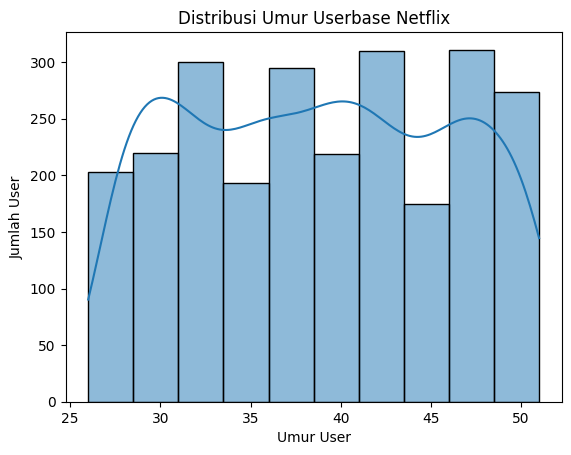

In [ ]:
sns.histplot(df['Age'].dropna(), bins=10, kde=True)
plt.title('Distribusi Umur Userbase Netflix')
plt.ylabel('Jumlah User')
plt.xlabel('Umur User')
plt.show()

Dari histogram di atas, terlihat bahwa sebagian besar pengguna Netflix berada dalam rentang umur tertentu. Distribusi umur tidak berbentuk normal. Hal ini menunjukkan bahwa ada kecenderungan tertentu dalam penggunaan Netflix berdasarkan usia.
Berdasarkan pola distribusi umur yang terlihat, mungkin ada peluang untuk meningkatkan penawaran konten atau fitur yang lebih menarik bagi kelompok usia tertentu, dengan ada nya fitur-fitur baru diharapkan ada nya peningkatan dalam penggunaan netflix

<ipython-input-16-563165c6c2cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x='Subscription Type', data=df, palette='Set2')


<Axes: xlabel='Subscription Type', ylabel='count'>

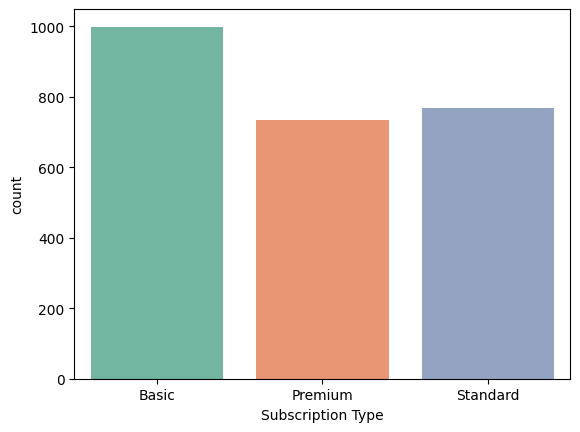

In [ ]:
sns.countplot (x='Subscription Type', data=df, palette='Set2')

dari visualisasi diatas dapat diketahui bahwa tipe yang paling banyak digunakan oleh user adalah basic

In [ ]:
sns.set()

sns.set_style("whitegrid")
sns.set_style("ticks",
    {"xtick.major.size":8,
     "ytick.major.size":8}
)
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

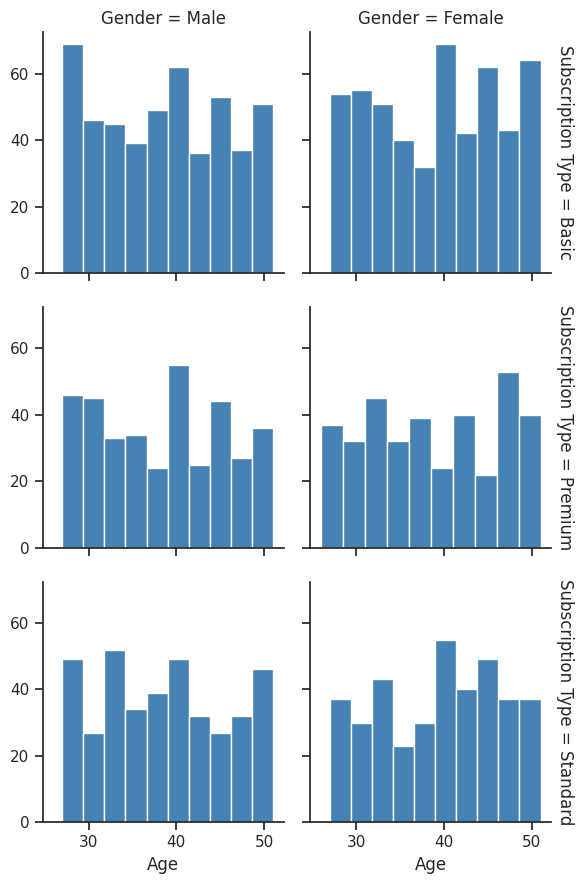

In [ ]:
g = sns.FacetGrid(df, col="Gender", row="Subscription Type", margin_titles=True)
g.map(plt.hist, "Age", color="steelblue")

plt.show()

pada visualisasi diatas terbagi menjadi 3 tipe langganan, yaitu basic, premium dan standar. pada gambar diatas merupakan perbandingan antara pengguna netflix perempuan dan laki-laki berdasarkan umur dan tipe langganan yang digunakan.

In [ ]:
g = g.map(plt.hist,"Age")

NameError: name 'g' is not defined

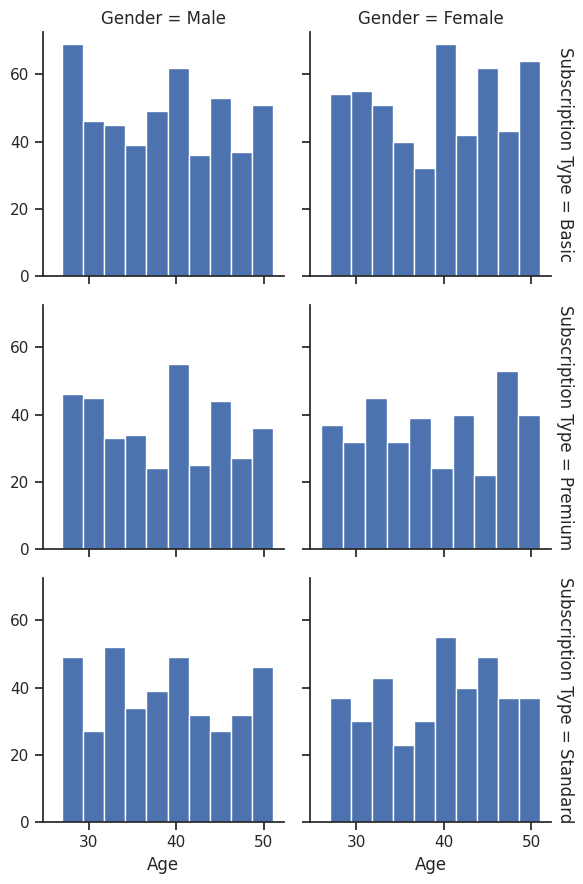

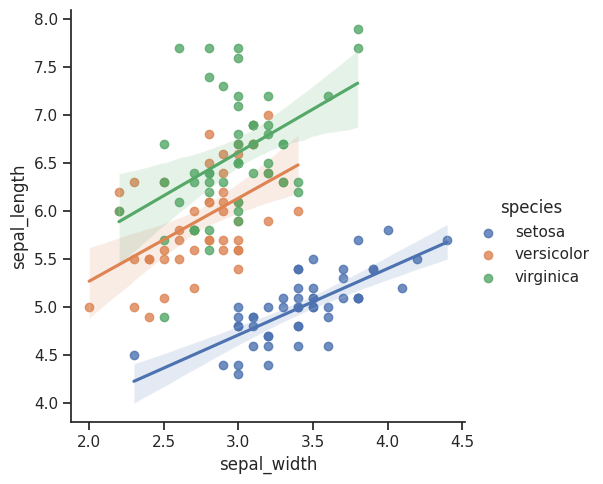

In [ ]:
iris = sns.load_dataset("iris")
sns.lmplot(x="sepal_width",
           y="sepal_length",
           hue="species",
           data=iris)

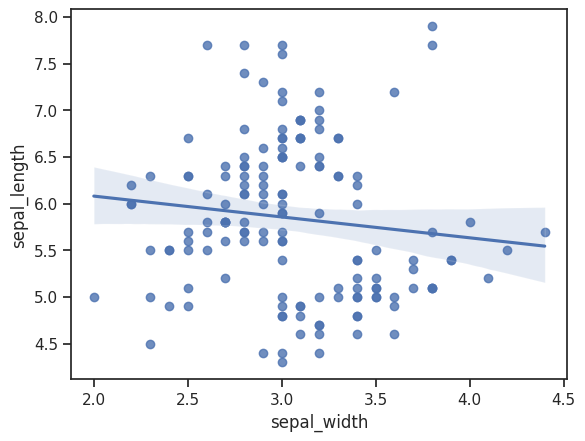

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x="sepal_width", y="sepal_length", data=iris, ax=ax)

plt.show()

<ipython-input-9-03608d2da839>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data.y,


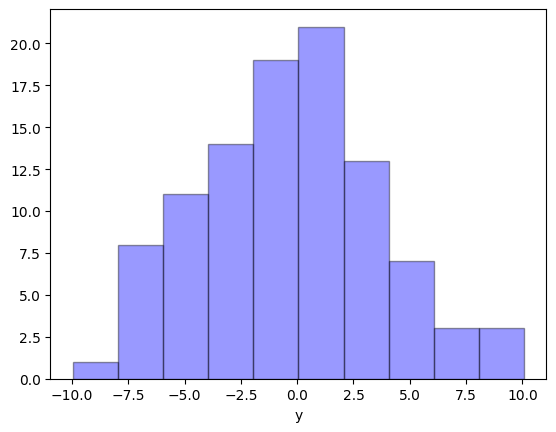

In [ ]:
uniform_data = np.random.rand(10, 12)
data = pd.DataFrame({'x':np.arange(1,101),'y':np.random.normal(0,4,100)})
plot = sns.distplot(data.y,
                    kde=False,
                    color="b",
                    hist_kws={"edgecolor": "k"})

<Axes: ylabel='Gender'>

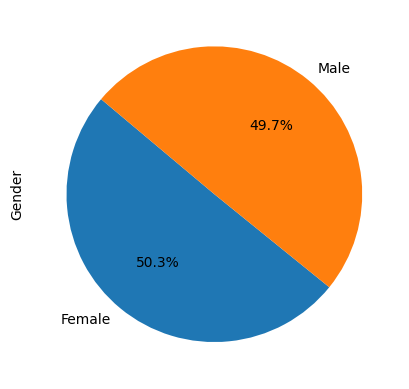

In [ ]:
gender_counts.plot(kind ='pie',
                   autopct= '%1.1f%%',
                   startangle=140)

dari visualisasi pie chart diatas dapat diketahui bahwa penguna netflix yang paling banyak adalah perempuan yaitu sebesar 50.3% sedangkan laki-laki sebesar 49.7%.

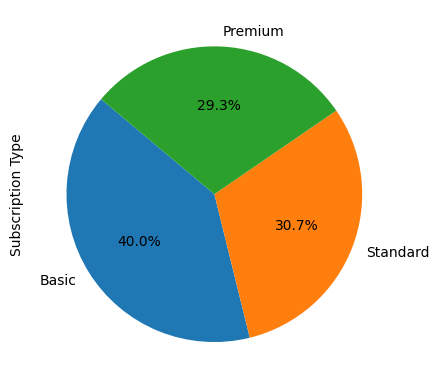

In [ ]:
SubscriptionType_counts = df['Subscription Type'].value_counts()
SubscriptionType_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.show()

dari visualisasi diatas terdapat 3 jenis tipe pengguna yaitu basic,standar dan premium. pada gambar diatas dapat diketahui bahwa tipe langganan yang palling banyak digunakan adalah basic yaitu sebesar 40.0%, selanjutnya adalah standard yaitu sebesar 30.7%, lalu premium sebesar 29.3%.

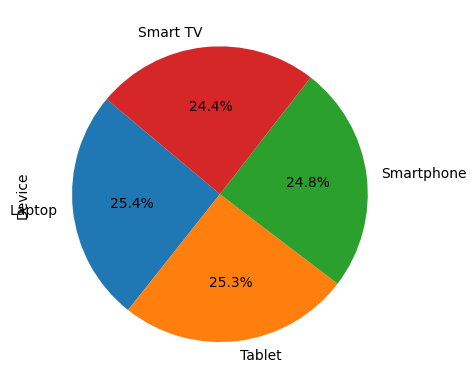

In [ ]:
Device_counts = df['Device'].value_counts()
Device_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.show()

pada visualisasi diatas dapat diketahui banyak device yang digunakan user untuk mengakses netflix ada 4 perangkat yang dapat digunakan, gambar diatas juga memberikan informasi mengenai presentase perangkat yang digunakan. dari gambar tersebut dapat diketahui bahwa perangkat yang paling banyak digunakan adalah laptop yaitu sebesar 25.4%.

<Axes: >

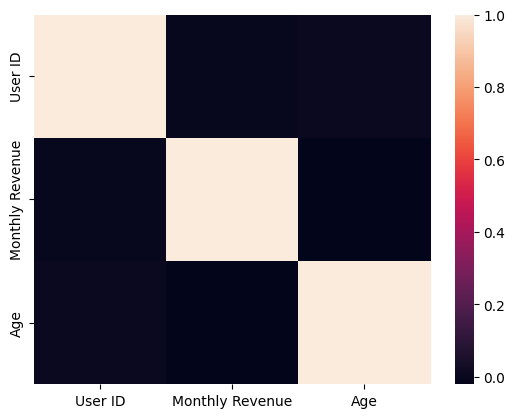

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

##**Verify Data Quality**

####Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Jumlah nilai kosong untuk setiap kolom:")
print(missing_values)

Jumlah nilai kosong untuk setiap kolom:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


dari hasil diatas dapat disimpulkan bahwa setiap kolom pada dataset memiliki nilai/lengkap(not null), dikarenakan jumlah nilai kosong untuk setiap kolom adalah 0.

In [ ]:
pd.DataFrame(df.isna().sum() /len(df)*100, columns=['NullRatio in %'])

,NullRatio in %
User ID,0.0
Subscription Type,0.0
Monthly Revenue,0.0
Join Date,0.0
Last Payment Date,0.0
Country,0.0
Age,0.0
Gender,0.0
Device,0.0
Plan Duration,0.0


dari 10 kolom diatas yaitu User ID,Subsciption Type,Monthly Revenue,Join Date
Last Payment Date,Country,Age,Gender,Device,Plan Duration semua kolom memiliki null ratio 0.0 yang berarti setiap kolom yang terdapat pada dataset tidak ada yang memiliki nilai null.

####Outliers Values

<ipython-input-21-2209850b4730>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subscription Type', y='Monthly Revenue', data=df, palette='pastel')


<Axes: xlabel='Subscription Type', ylabel='Monthly Revenue'>

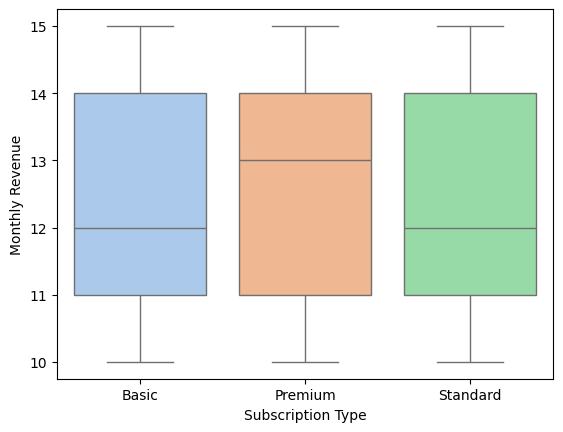

In [ ]:
sns.boxplot(x='Subscription Type', y='Monthly Revenue', data=df, palette='pastel')


visualisasi ini memberikan gambaran tentang sebaran pendapatan bulanan berdasarkan jenis langganan,pada gambar diatas dapat dilihat bahwa terdapat 3 tipe langganan yaitu basic, premium, dan standard.

dari visualisasi diatas tidak terdapat outlier pada setiap jenis tipe langganan terhadap pendapatan bulanan, dari hasil ini dapat disimpulkan bahwa mayoritas pendapatan bulanan berada dalam kisaran yang serupa di setiap kategori langganan (basic, premium, dan standard).

####Duplicated Values

In [ ]:

duplicate_rows = df[df.duplicated()]

print("Duplikat di seluruh dataset:")
print(duplicate_rows)


Duplikat di seluruh dataset:
Empty DataFrame
Columns: [User ID, Subscription Type, Monthly Revenue, Join Date, Last Payment Date, Country, Age, Gender, Device, Plan Duration]
Index: []


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

df [df.duplicated()] digunakan untuk memeriksa seluruh duplikat yang mungkin ada dalam dataset untuk menampilkan hasil tersebut digunakan perintah print(duplicate_rows)
pada hasil diatas dapat disimpulkan bahwa data pada dataset tidak memiliki baris yang duplikat

pada cara kedua yaitu df.duplicated setiap baris memiliki nilai false yang berarti tidak ada nilai duplikat pada dataset

####Inconsistent Values / Noise (Optional)

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

---



In [30]:
print((df.isna().sum() / len(df)) * 2500)

User ID              0.0
Subscription Type    0.0
Monthly Revenue      0.0
Join Date            0.0
Last Payment Date    0.0
Country              0.0
Age                  0.0
Gender               0.0
Device               0.0
Plan Duration        0.0
dtype: float64


dari hasil diatas dapat disimpulkan bahwa Semua kolom memiliki nilai 0.0, yang berarti setiap kolom dalam DataFrame memiliki data lengkap tanpa ada nilai yang hilang (missing values).

kode diatas digunakan untuk menampilkan persentase nilai yang hilang (missing values) dalam setiap kolom pada DataFrame.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [31]:
df[df.duplicated()]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration


kode diatas digunakan untuk menampilkan nilai duplikat pada setiap kolom

In [32]:
df = df.drop_duplicates()

kode diatas berfungsi untuk menaghapus data duplikat pada kolom yang ada.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [33]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})


results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)


display(results_df)

Kolom,Persentase Outliers
User ID,0.0
Monthly Revenue,0.0
Age,0.0


pada hasil diatas didapatkan hasil tidak ada nilai outliers pada dataset.

kode diatas berfungsi untuk menghitung nilai-nilai outliers yang ada pada dalamm dataset. pada kode diatas terdapat list yang digunakan untuk menyimpan informasi tentang persentase outliers setiap kolom yang memenuhi syarat. cols diatas berfungsi untuk memilih jenis kolom (float64, int64) yang akan dihitung presentase outlier nya, selanjutnya terdapat for col in cols, ini berfungsi untuk melakukan perulangan. pada kode diatas juga terdapat percent_outliers ini berfungsi untuk presentase outlier yang ada pada dataframe. terakhir terdapat display yang berfungsi Menampilkan DataFrame yang berisi persentase outliers untuk setiap kolom numerik.

###**construct data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [34]:
def kategori(age):
    if 26 <= age < 49:
        return 'Adult'
    else:
        return 'Elderly'
df['kategori'] = df['Age'].apply(kategori)

kode diatas berfungsi untuk menampilkan data pada dataset berdasarkan umur pengguna dengan melakukan pengkategorian, hal ini dilakukan untuk mempermudah dalam mengetahui umur pengguna melalui pengelompokkan umur.

pada kode tersebut terdapat def kategori (age) yang berfungsi untuk melakukan pengelompokkan pengguna berdasarkan umur, lalu terdapat if 26<=age < 49 yang berarti dari rentang usia 26-49 akan digolongkan menjadi kelompok adult, selain dari rentang umur tersebut maka akan dikategorikan sebagai ederly.

In [35]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,kategori
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,Adult
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,Adult
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Adult
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,Elderly
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,Adult
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,Adult
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,Adult
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,Adult
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,Adult


In [ ]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,kategori
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,Adult
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,Adult
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Adult
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,Elderly
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,Adult


setelah melakukan pengelompokkan selanjutnya adalah menampilkan data dari hasil pengelompokkan tersebut dengan menggunakan df atau menggunakan df.head. df berfungsi untuk menampilkan semua kolom pada dataset sedangkan df head hanya menampilkan data paling atas yang ada pada dataset.

dari hasil diatas terdapat kolom tambahan pada datasetnya yaitu kolom kategori, kolom tersebut merupakan hasil dari kolom pengelompokkan

In [36]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

df['duration_days'] = (df['Last Payment Date'] - df['Join Date']).dt.days



tujuan saya menggunakan kode diatas adalah untuk mempermudah dalam mengetahui lama penggunaan netflix.

In [37]:
df


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,kategori,duration_days
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,Adult,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,Adult,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,Adult,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,Elderly,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,Adult,174
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,Adult,500
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,Adult,462
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,Adult,310
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,Adult,364


#**Data Reduction**

In [38]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

kode diatas berfungsi untuk menampilkan matriks korelasi dalam bentuk heatmap, tipe data yang digunakan adalah numeric(int) gambar diatas merupakan tampilan sebelum User ID dihapus.

In [39]:
df = df.drop(['User ID'], axis=1)

alasan saya menghapus kolom User ID adalah karena kurang relevan dengan data-data yang akan di analisis lebih lanjut. 'User ID' hanya berisi identifikasi unik untuk setiap pengguna dan tidak memberikan informasi yang relevan untuk analisis peningkatan pengguna Netflix.

###**Pengecekkan Hasil**

In [40]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,kategori,duration_days
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,Adult,629
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,Adult,774
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,Adult,119
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,Elderly,262
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,Adult,174


tabel diatas merupakan tampilan sesudah user id dihapus

#**Data Transformation**

In [ ]:
print(df.columns)

Index(['Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'kategori', 'duration_days'],
      dtype='object')


kode diatas berfungsi untuk menampilkan kolom yang ada di dalam dataset

In [41]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['kategori'] = df['kategori'].map({'Adult': 1, 'Elderly': 2}).astype(int)
device_mapping = {'Laptop': 1, 'Tablet': 2, 'Smartphone': 3, 'Smart TV': 4, 'Unknown': 0}
df['Device'] = df['Device'].map(device_mapping).fillna(0).astype(int)
subscription_mapping = {'Basic': 0, 'Premium': 1, 'Standard': 2, 'Unknown': -1}
df['Subscription Type'] = df['Subscription Type'].map(subscription_mapping).fillna(-1).astype(int)



In [42]:
df

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,kategori,duration_days
0,0,10,2022-01-15,2023-10-06,United States,28,1,3,1 Month,1,629
1,1,15,2021-05-09,2023-06-22,Canada,35,0,2,1 Month,1,774
2,2,12,2023-02-28,2023-06-27,United Kingdom,42,1,4,1 Month,1,119
3,2,12,2022-10-07,2023-06-26,Australia,51,0,1,1 Month,2,262
4,0,10,2023-01-05,2023-06-28,Germany,33,1,3,1 Month,1,174
...,...,...,...,...,...,...,...,...,...,...,...
2495,1,14,2022-07-25,2023-12-07,Spain,28,0,4,1 Month,1,500
2496,0,15,2022-04-08,2023-07-14,Spain,33,0,4,1 Month,1,462
2497,2,12,2022-09-08,2023-07-15,United States,38,1,1,1 Month,1,310
2498,2,13,2022-12-08,2023-12-07,Canada,48,0,2,1 Month,1,364


###**Encoding**


In [43]:
df = pd.get_dummies(df)

In [44]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Age,Gender,Device,kategori,duration_days,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Plan Duration_1 Month
0,0,10,2022-01-15,2023-10-06,28,1,3,1,629,0,0,0,0,0,0,0,0,0,1,1
1,1,15,2021-05-09,2023-06-22,35,0,2,1,774,0,0,1,0,0,0,0,0,0,0,1
2,2,12,2023-02-28,2023-06-27,42,1,4,1,119,0,0,0,0,0,0,0,0,1,0,1
3,2,12,2022-10-07,2023-06-26,51,0,1,2,262,1,0,0,0,0,0,0,0,0,0,1
4,0,10,2023-01-05,2023-06-28,33,1,3,1,174,0,0,0,0,1,0,0,0,0,0,1


tahapan ini merupakan tahap data transformation yang memiliki manfaat untuk merubah suatu data menjadi format baru agar dapat memudahkan model dalam melakukan analisa. pada kolom ini terdapat kolom gender yang berisikan int 0 dan 1 dimana 0 merupakan female dan 1 merupakan male. selaint itu terdapat juga kolom device yang berisikan int 1,2,3,4. dimana 1 merupakan kode dari Device Laptop, 2 adalah tablet, 3 adalah Smartphone dana 4 adalah smart tv.

kolom kategori pada tabel diatas merupakan kolom dari golongan usia misal usia dari rentang 26-49 termasuk golongan adult yang ditandai dengan angka 1 sedangkan jika usia pengguna lebih dari 49 maka akan masuk golongan elderly yang mempunyai kode angka 2



##**Konversi Dataframe ke File CSV**

In [45]:
df.to_csv("Data Cleaned.csv")

In [46]:
df.to_csv("Data Cleaned.csv", index=False)

kode diatas digunakan untuk menyimpan dataFrame ke dalam format file csv.